In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_copy1 = pd.read_csv('online_retail_cleaned.csv')

### Pedidos totales

In [3]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541759 entries, 0 to 541758
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541759 non-null  object 
 1   StockCode    541759 non-null  object 
 2   Description  541759 non-null  object 
 3   Quantity     541759 non-null  int64  
 4   InvoiceDate  541759 non-null  object 
 5   UnitPrice    541759 non-null  float64
 6   CustomerID   541759 non-null  float64
 7   Country      541759 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df_copy1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_copy1.describe()

,Quantity,UnitPrice,CustomerID
count,541759.00000,541759.000000,541759.000000
mean,9.55664,4.101184,14554.781672
std,218.11106,34.951793,1955.672182
min,-80995.00000,0.000000,12345.000000
25%,1.00000,1.250000,12356.000000
50%,3.00000,2.080000,14382.000000
75%,10.00000,4.130000,16255.000000
max,80995.00000,8142.750000,18287.000000


In [11]:
# Se observa que hay Quantity negativa, lo que sugiere que son devoluciones.
# Determinamos el total de pedidos con base al numero de Invoice
# Separamos con un dataframe nuevo los pedidos con quantities positivas

df_copy_invoice = df_copy1[df_copy1['Quantity'] > 0]
df_copy_dev = df_copy1[df_copy1['Quantity'] < 0]

# Confirmamos si hay Quantity iguales a cero

df_copy1[df_copy1['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
# Creamos un DF con los invoices agrupados

df_copy_pedido = df_copy_invoice.groupby('InvoiceNo').agg({'Quantity': 'sum', 'UnitPrice': 'mean', 'Country': 'first','InvoiceDate': 'first'}).reset_index()
df_copy_pedido.head()

,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate
0,536365,40,3.910000,United Kingdom,2010-12-01 08:26:00
1,536366,12,1.850000,United Kingdom,2010-12-01 08:28:00
2,536367,83,4.853333,United Kingdom,2010-12-01 08:34:00
3,536368,15,4.775000,United Kingdom,2010-12-01 08:34:00
4,536369,3,5.950000,United Kingdom,2010-12-01 08:35:00


In [25]:

# Determinamos el total de pedidos con base al numero total de Invoices

print('Total de pedidos:', df_copy_pedido['InvoiceNo'].nunique())

Total de pedidos: 20708


In [28]:
# Determinamos el total de devoluciones

df_copy_dev2 = df_copy_dev.groupby('InvoiceNo').agg({'Quantity': 'sum', 'UnitPrice': 'mean', 'Country': 'first','InvoiceDate': 'first'}).reset_index()
df_copy_dev2.head()

,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate
0,536589,-10,0.0,United Kingdom,2010-12-01 16:50:00
1,536764,-38,0.0,United Kingdom,2010-12-02 14:42:00
2,536996,-20,0.0,United Kingdom,2010-12-03 15:30:00
3,536997,-20,0.0,United Kingdom,2010-12-03 15:30:00
4,536998,-6,0.0,United Kingdom,2010-12-03 15:30:00


In [29]:
print('Total de devoluciones:', df_copy_dev2['InvoiceNo'].nunique())

Total de devoluciones: 5042


In [33]:
# Determinamos el total de pedidos 'efectivos' (sin devoluciones)

print('Total de pedidos efectivos:', df_copy_pedido['InvoiceNo'].nunique() - df_copy_dev2['InvoiceNo'].nunique())


Total de pedidos efectivos: 15666


In [47]:
# Determinmos el total de pedidos por pais y ordenamos los 10 primeros

df_copy_pedido_country = df_copy_pedido.groupby('Country').agg({'InvoiceNo': 'nunique'}).reset_index()
df_copy_pedido_country = df_copy_pedido_country.rename(columns={'InvoiceNo': 'Total_Pedidos'})
df_copy_pedido_country = df_copy_pedido_country.sort_values(by='Total_Pedidos', ascending=False).head(10)
df_copy_pedido_country['%Country'] = df_copy_pedido_country['Total_Pedidos'] / df_copy_pedido_country['Total_Pedidos'].sum() * 100

df_copy_pedido_country

,Country,Total_Pedidos,%Country
36,United Kingdom,18766,92.193564
14,Germany,457,2.245149
13,France,392,1.925817
10,EIRE,288,1.414886
3,Belgium,98,0.481454
24,Netherlands,95,0.466716
31,Spain,90,0.442152
27,Portugal,58,0.284942
0,Australia,57,0.280029
33,Switzerland,54,0.265291


C:\Users\Luis\AppData\Local\Temp\ipykernel_26776\3658858852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total_Pedidos', data=df_copy_pedido_country, palette='viridis')


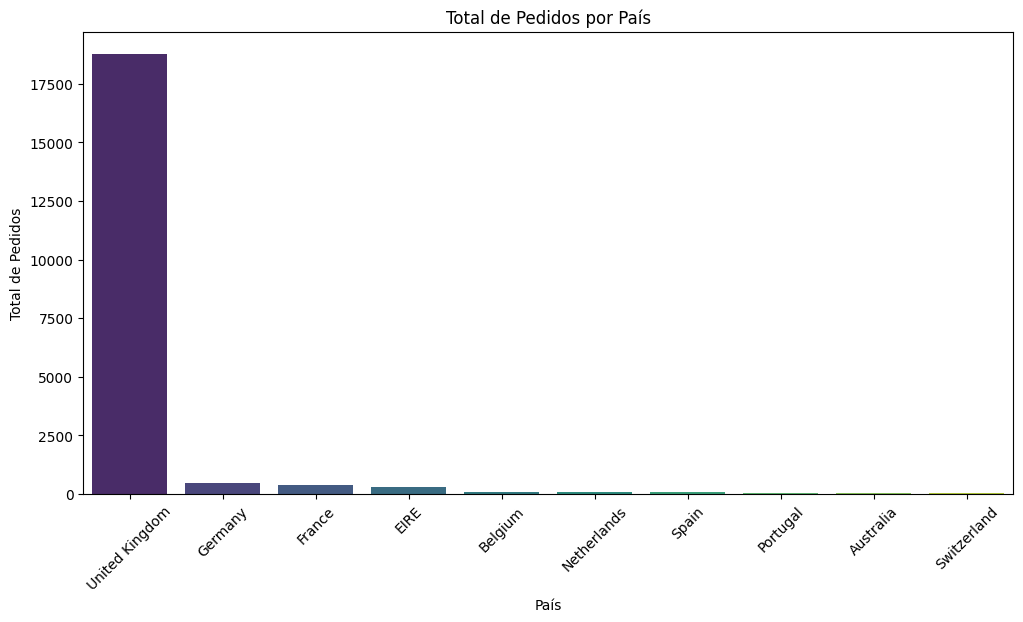

In [43]:
# Graficamos el total de pedidos por pais

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total_Pedidos', data=df_copy_pedido_country, palette='viridis')
plt.title('Total de Pedidos por País')
plt.xlabel('País')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.show()


In [46]:
# calculamos el total de devoluciones por pais y ordenamos los 10 primeros

df_copy_dev_country = df_copy_dev2.groupby('Country').agg({'InvoiceNo': 'nunique'}).reset_index()
df_copy_dev_country = df_copy_dev_country.rename(columns={'InvoiceNo': 'Total_Devoluciones'})
df_copy_dev_country = df_copy_dev_country.sort_values(by='Total_Devoluciones', ascending=False).head(10)
df_copy_dev_country['%Country'] = df_copy_dev_country['Total_Devoluciones'] / df_copy_dev_country['Total_Devoluciones'].sum() * 100

df_copy_dev_country

,Country,Total_Devoluciones,%Country
29,United Kingdom,4578,92.242595
12,Germany,146,2.941769
8,EIRE,72,1.450735
11,France,69,1.390288
3,Belgium,21,0.423131
27,Switzerland,20,0.402982
16,Italy,17,0.342535
25,Spain,15,0.302237
22,Portugal,13,0.261938
0,Australia,12,0.241789
